In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
#import time library and datetime module from datetime library
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#add lats and longs to a list
coordinates = list(lat_lngs)
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.24165812007888 -141.20151392858563
-8.244879569434403 68.23508968612595
-24.78674945264217 -155.5398112916699
-5.455006225366034 66.56478154891121
-71.06174616414256 169.19617773371317
7.308565042541289 167.5403203599784
-88.51138640394694 50.93874981560063
24.76143631385213 81.54202183109868
-73.58115596498492 -81.72389441751957
81.19512643005521 164.81268410085926
30.805365251755475 33.50813287692631
-89.96290204375843 -155.04712696142744
-82.76927015954274 153.728466409438
11.389102559143595 122.62968029101552
43.05524401019247 48.137838422851274
74.51573561038276 -158.91992660110054
-77.0989983731711 -157.83298391259046
5.577176966810413 -76.24255870387759
-5.583688263275633 126.22660435626489
69.30345507358484 -13.57303805526874
-75.50321972823835 32.370543462753744
-31.489269846306712 -106.13963384108507
-52.909105508360966 170.22771100081758
-57.18077499752657 -89.74600727513474
-4.400221296476786 113.86489191663577
16.39563809024196 -35.32842858642326
-4.4103526939903475 112

In [5]:
#create a list for holding cities
cities = []
#identify nearest city for each lat and lng combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the city list.
    if city not in cities:
        cities.append(city)
#pring the city count to confirm count.
len(cities)

622

In [6]:
#create an empty list to hold the weather data.
city_data = []
#print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")
#create counters.
record_count = 1 
set_count = 1

    #loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #log the URL, Record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count.
    record_count +=1
#run an API request for each of the cities
    try:
        #parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         "lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#indicate that the data loading is completed.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | mangawan
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | ofaqim
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | mangoso
Processing Record 13 of Set 1 | kaspiysk
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | bagado
Processing Record 16 of Set 1 | ambon
Processing Record 17 of Set 1 | husavik
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | banjarmasin
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 of Set 1 | sampit
Processing Re

Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | broken hill
Processing Record 42 of Set 4 | petrov val
Processing Record 43 of Set 4 | linchuan
City not found. Skipping...
Processing Record 44 of Set 4 | houston
Processing Record 45 of Set 4 | qaqortoq
Processing Record 46 of Set 4 | itarema
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | vostok
Processing Record 49 of Set 4 | bilibino
Processing Record 50 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | tselina
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | gallup
Processing Record 5 of Set 5 | birin
Processing Record 6 of Set 5 | choix
Processing Record 7 of Set 5 | wiwili
Processing Record 8 of Set 5 | progreso
Processing Record 9 of Set 5 | brae
Processing Record 10 of Set 5 | seoul
Processing Record 11 of Set 5 | kortkeros
Processing Record 1

City not found. Skipping...
Processing Record 31 of Set 8 | borama
City not found. Skipping...
Processing Record 32 of Set 8 | acarau
Processing Record 33 of Set 8 | kandrian
Processing Record 34 of Set 8 | bobrovka
Processing Record 35 of Set 8 | lasa
Processing Record 36 of Set 8 | hillsborough
Processing Record 37 of Set 8 | jabinyanah
Processing Record 38 of Set 8 | sines
Processing Record 39 of Set 8 | adiake
Processing Record 40 of Set 8 | banda aceh
Processing Record 41 of Set 8 | saint-pierre
Processing Record 42 of Set 8 | kazachinskoye
Processing Record 43 of Set 8 | nagato
Processing Record 44 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 45 of Set 8 | muzhi
Processing Record 46 of Set 8 | mahajanga
Processing Record 47 of Set 8 | haapiti
Processing Record 48 of Set 8 | arti
Processing Record 49 of Set 8 | usinsk
Processing Record 50 of Set 8 | port-cartier
Processing Record 1 of Set 9 | asyut
Processing Record 2 of Set 9 | sao joao da barra
Processing R

Processing Record 20 of Set 12 | ovalle
Processing Record 21 of Set 12 | benghazi
Processing Record 22 of Set 12 | sao jose da coroa grande
Processing Record 23 of Set 12 | cam ranh
Processing Record 24 of Set 12 | el reno
Processing Record 25 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 26 of Set 12 | reconquista
Processing Record 27 of Set 12 | jumla
Processing Record 28 of Set 12 | kholodnyy
Processing Record 29 of Set 12 | kazanskoye
Processing Record 30 of Set 12 | boca do acre
Processing Record 31 of Set 12 | sigli
Processing Record 32 of Set 12 | nushki
Processing Record 33 of Set 12 | ust-maya
Processing Record 34 of Set 12 | healdsburg
Processing Record 35 of Set 12 | baganga
Processing Record 36 of Set 12 | adet
Processing Record 37 of Set 12 | griffith
Processing Record 38 of Set 12 | byumba
Processing Record 39 of Set 12 | lingao
Processing Record 40 of Set 12 | vestmannaeyjar
Processing Record 41 of Set 12 | bay city
Processing Record 42 of Set 12 | c

In [7]:
len(city_data)

575

In [8]:
#put city data list into a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.0531,-135.3300,44.49,57,100,17.27,US,2022-04-02 18:25:04
1,Hithadhoo,-0.6000,73.0833,83.30,68,17,4.54,MV,2022-04-02 18:26:31
2,Avera,33.1940,-82.5271,72.37,42,50,4.45,US,2022-04-02 18:26:32
3,Bluff,-46.6000,168.3333,57.27,72,80,19.37,NZ,2022-04-02 18:26:32
4,Butaritari,3.0707,172.7902,81.19,76,55,15.32,KI,2022-04-02 18:26:32
5,Port Alfred,-33.5906,26.8910,64.18,88,100,3.00,ZA,2022-04-02 18:26:33
6,Mangawan,24.6833,81.5500,83.77,7,0,5.59,IN,2022-04-02 18:26:33
7,Ushuaia,-54.8000,-68.3000,40.66,87,100,2.30,AR,2022-04-02 18:26:33
8,Pevek,69.7008,170.3133,-9.40,97,100,2.37,RU,2022-04-02 18:26:34
9,Ofaqim,31.3141,34.6203,71.53,37,100,3.24,IL,2022-04-02 18:26:34


In [9]:
#change column order of DataFrame
new_column_order = ['City', 'Country', 'Date', 'lat', 'lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-04-02 18:25:04,57.0531,-135.3300,44.49,57,100,17.27
1,Hithadhoo,MV,2022-04-02 18:26:31,-0.6000,73.0833,83.30,68,17,4.54
2,Avera,US,2022-04-02 18:26:32,33.1940,-82.5271,72.37,42,50,4.45
3,Bluff,NZ,2022-04-02 18:26:32,-46.6000,168.3333,57.27,72,80,19.37
4,Butaritari,KI,2022-04-02 18:26:32,3.0707,172.7902,81.19,76,55,15.32


In [10]:
#create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
lats = city_data_df["lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
#get todays time in seconds
today = time.strftime("%x")
today

'04/02/22'

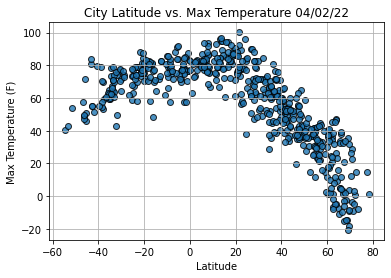

In [18]:
#build scatter plot for lat vs max temp
plt.scatter (lats, max_temps, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig1.png")
#show the plot
plt.show()

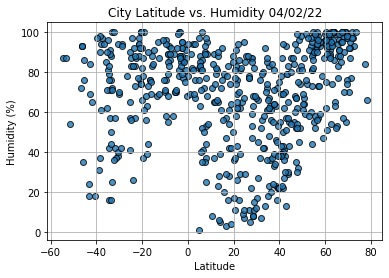

In [19]:
#build scatter plot for lat vs max temp
plt.scatter (lats, humidity, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig2.png")
#show the plot
plt.show()

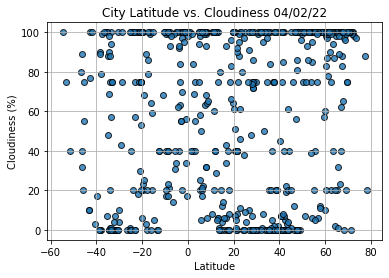

In [20]:
#build scatter plot for lat vs max temp
plt.scatter (lats, cloudiness, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig3.png")
#show the plot
plt.show()

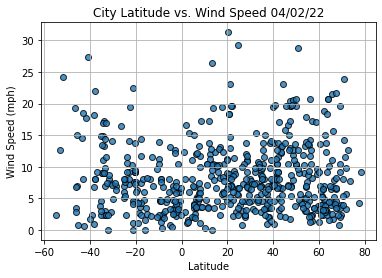

In [21]:
#build scatter plot for lat vs max temp
plt.scatter (lats, wind_speed, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig4.png")
#show the plot
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

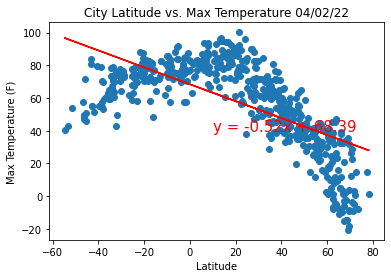

In [36]:
plot_linear_regression(lats, max_temps, f"City Latitude vs. Max Temperature {today}"
                      , "Max Temperature (F)", (10,40))

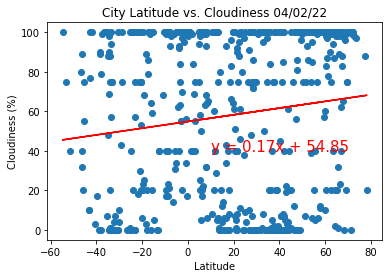

In [37]:
plot_linear_regression(lats, cloudiness, f"City Latitude vs. Cloudiness {today}"
                      , "Cloudiness (%)", (10,40))

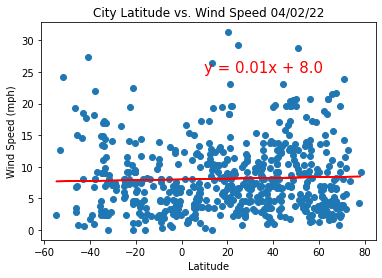

In [39]:
plot_linear_regression(lats, wind_speed, f"City Latitude vs. Wind Speed {today}"
                      , "Wind Speed (mph)", (10,25))

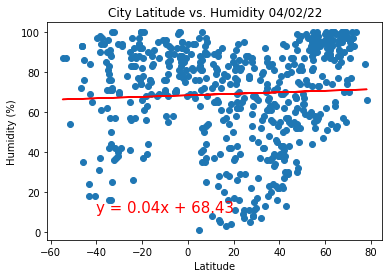

In [41]:
plot_linear_regression(lats, humidity, f"City Latitude vs. Humidity {today}"
                      , "Humidity (%)", (-40,10))

In [48]:
city_data_df.index.name = 'City_ID'
city_data_df.head()

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Sitka,US,2022-04-02 18:25:04,57.0531,-135.3300,44.49,57,100,17.27
1,Hithadhoo,MV,2022-04-02 18:26:31,-0.6000,73.0833,83.30,68,17,4.54
2,Avera,US,2022-04-02 18:26:32,33.1940,-82.5271,72.37,42,50,4.45
3,Bluff,NZ,2022-04-02 18:26:32,-46.6000,168.3333,57.27,72,80,19.37
4,Butaritari,KI,2022-04-02 18:26:32,3.0707,172.7902,81.19,76,55,15.32


In [46]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-04-02 18:26:35
lat                       71.2906
lng                     -156.7887
Max Temp                    -9.38
Humidity                       77
Cloudiness                      0
Wind Speed                   11.5
Name: 13, dtype: object

In [49]:
city_data_df['lat'] >=0

City_ID
0       True
1      False
2       True
3      False
4       True
       ...  
570     True
571     True
572     True
573    False
574     True
Name: lat, Length: 575, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["lat"] >=0)].head()

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Sitka,US,2022-04-02 18:25:04,57.0531,-135.3300,44.49,57,100,17.27
2,Avera,US,2022-04-02 18:26:32,33.1940,-82.5271,72.37,42,50,4.45
4,Butaritari,KI,2022-04-02 18:26:32,3.0707,172.7902,81.19,76,55,15.32
6,Mangawan,IN,2022-04-02 18:26:33,24.6833,81.5500,83.77,7,0,5.59
8,Pevek,RU,2022-04-02 18:26:34,69.7008,170.3133,-9.40,97,100,2.37


In [52]:
northern_hemi_df = city_data_df.loc[(city_data_df["lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["lat"] < 0)]

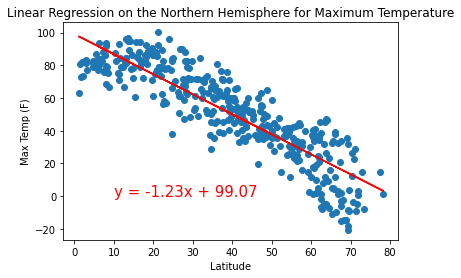

In [73]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                       'Max Temp (F)', (10,0))

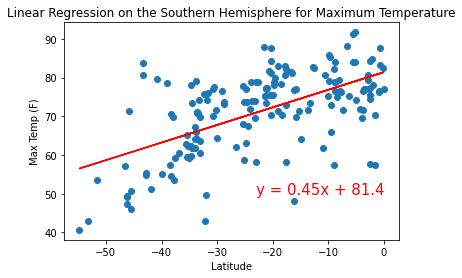

In [74]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp (F)", (-23,50))

In [75]:
linregress(southern_hemi_df['lat'],southern_hemi_df['Max Temp'])

LinregressResult(slope=0.4543541836943987, intercept=81.40064367868723, rvalue=0.5946927166836186, pvalue=9.829386238637667e-18, stderr=0.0472486352644341, intercept_stderr=1.2166510148196263)

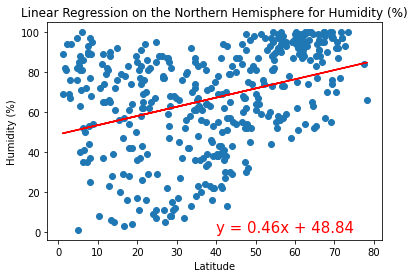

In [76]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Humidity (%)",
                       'Humidity (%)', (40,0))

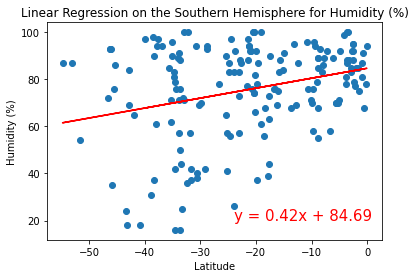

In [77]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Humidity (%)",
                       'Humidity (%)', (-24,20))

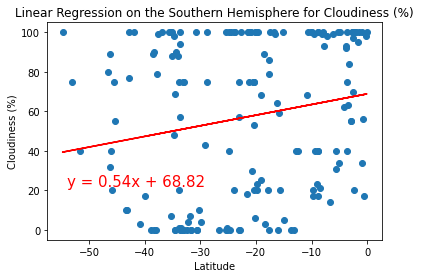

In [78]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Cloudiness (%)",
                       'Cloudiness (%)', (-54,22))

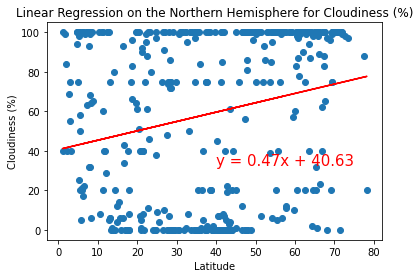

In [80]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Cloudiness (%)",
                       'Cloudiness (%)', (40,33))

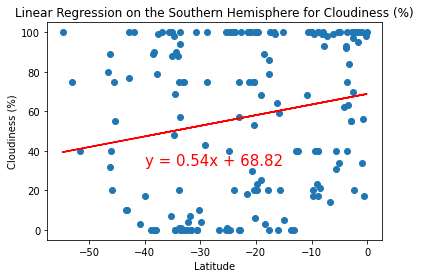

In [82]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Cloudiness (%)",
                       'Cloudiness (%)', (-40,33))

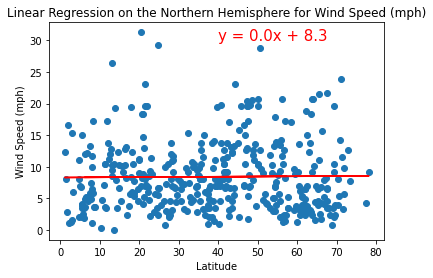

In [84]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Wind Speed (mph)",
                       'Wind Speed (mph)', (40,30))

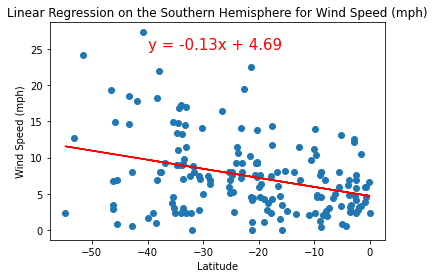

In [86]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed (mph)",
                       'Wind Speed (mph)', (-40,25))